== Alameda Case study ==

Null Hypothesis (h0): Panel members were chosen at random from eligible population. 

Alternate Hypothesis (h1): Panel members were not chosen at random from eligible population. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
jury = pd.DataFrame({"Ethinicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]})
jury.set_index("Ethinicity")
jury

,Ethinicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


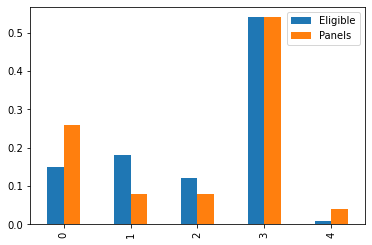

In [12]:
jury.plot.bar()

In [22]:
jury["Panels-Eligible"] = jury["Panels"]-jury["Eligible"]
jury

,Ethinicity,Eligible,Panels,Panels-Eligible
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


In [21]:
print("{:.2f}".format(jury["Panels-Eligible"].sum()))

0.00


In [33]:
print("{:.2f}".format(jury[jury["Panels-Eligible"]>0]["Panels-Eligible"].sum()))
print("{:.2f}".format(jury[jury["Panels-Eligible"]<0]["Panels-Eligible"].sum()))
print("{:.2f}".format(jury[jury["Panels-Eligible"]>0]["Panels-Eligible"].sum() + abs(jury[jury["Panels-Eligible"]<0]["Panels-Eligible"].sum())))

0.14
-0.14
0.28


In [24]:
jury["ABS_Panels-Eligible"] = abs(jury["Panels"]-jury["Eligible"])
jury

,Ethinicity,Eligible,Panels,Panels-Eligible,ABS_Panels-Eligible
0,Asian,0.15,0.26,0.11,0.11
1,Black,0.18,0.08,-0.10,0.10
2,Latino,0.12,0.08,-0.04,0.04
3,White,0.54,0.54,0.00,0.00
4,Other,0.01,0.04,0.03,0.03


In [30]:
print("{:.2f}".format(jury["ABS_Panels-Eligible"].sum()))

0.28


In [48]:
obberved_stat = np.abs(jury["Panels"]-jury["Eligible"]).sum()
print("{:.2f}".format(obberved_stat))

0.28


== Sampling at Random ==

In [49]:
panel_size = 1453

In [50]:
np.random.multinomial(panel_size,[0.15,0.18,0.12,0.54,0.01])

array([223, 261, 174, 782,  13])

In [52]:
np.random.multinomial(panel_size,[0.15,0.18,0.12,0.54,0.01])

array([193, 250, 180, 816,  14])

In [54]:
jury["Random_Sample"] = np.random.multinomial(panel_size,[0.15,0.18,0.12,0.54,0.01])/panel_size
jury

,Ethinicity,Eligible,Panels,Panels-Eligible,ABS_Panels-Eligible,Random_Sample
0,Asian,0.15,0.26,0.11,0.11,0.146593
1,Black,0.18,0.08,-0.10,0.10,0.183070
2,Latino,0.12,0.08,-0.04,0.04,0.128699
3,White,0.54,0.54,0.00,0.00,0.531315
4,Other,0.01,0.04,0.03,0.03,0.010323


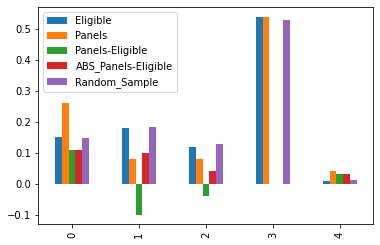

In [60]:
jury.plot.bar()

Total Variation Distance (TVD)

In [62]:
(abs(jury["Eligible"]-jury["Random_Sample"])).sum()/2

0.012092222986923605

In [68]:
sims = 5000
tvd_list = []
for i in np.arange(sims):
  jury["Random_Sample"] = np.random.multinomial(panel_size,[0.15,0.18,0.12,0.54,0.01])/panel_size
  tvd_list.append(np.abs(jury["Eligible"]-jury["Random_Sample"]).sum())

tvd = pd.DataFrame(tvd_list)
tvd

,0
0,0.026249
1,0.018610
2,0.027502
3,0.024749
4,0.030984
...,...
4995,0.047295
4996,0.042147
4997,0.025492
4998,0.068121


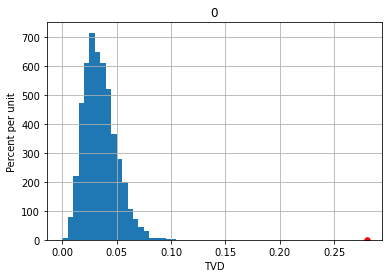

In [71]:
tvd.hist(bins=np.arange(0,0.2,0.005))
plt.xlabel("TVD")
plt.ylabel("Percent per unit")
plt.scatter(obberved_stat,0,color='red',s=30)